## 7 - What is the average number of aces per match? 

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

files_to_load = glob(f'../data/raw/*/statistics_[0-9]*.parquet')

dfs_to_load = [pd.read_parquet(file, columns=['match_id', 'period', 'statistic_category_name', 
                                              'statistic_name', 'home_stat', 'away_stat']) for file in files_to_load]
df_loaded = pd.concat(dfs_to_load)
df_loaded.sample(5)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat
26,12180564,1ST,service,service_games_played,4,3
27,12105399,1ST,points,service_points_won,21,21
21,12173956,1ST,service,double_faults,0,2
23,12128411,1ST,service,second_serve,19/20 (95%),10/11 (91%)
42,12039850,2ND,service,second_serve_points,4/12 (33%),3/12 (25%)


In [2]:
# Getting aces
filtered_df = df_loaded[
    (df_loaded['period'] == 'ALL') & 
    (df_loaded['statistic_category_name'] == 'service') & 
    (df_loaded['statistic_name'] == 'aces')
].copy()
filtered_df.sample(5)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat
0,12180584,ALL,service,aces,2,1
0,12165995,ALL,service,aces,0,2
0,12165774,ALL,service,aces,2,0
0,12114291,ALL,service,aces,9,0
0,12145288,ALL,service,aces,0,1


In [3]:
home_numeric = pd.to_numeric(filtered_df['home_stat'], errors='coerce')
away_numeric = pd.to_numeric(filtered_df['away_stat'], errors='coerce')

all_aces = pd.concat([home_numeric, away_numeric], ignore_index=True)
avg_aces_all_players = all_aces.mean()

print("\nAnalysis:")
print(f"\nAll players Average is: {avg_aces_all_players:.2f} aces/match")
print(f"Home players Average is: {home_numeric.mean():.2f} aces/match")
print(f"Away players Average is: {away_numeric.mean():.2f} aces/match")


Analysis:

All players Average is: 2.73 aces/match
Home players Average is: 2.76 aces/match
Away players Average is: 2.71 aces/match


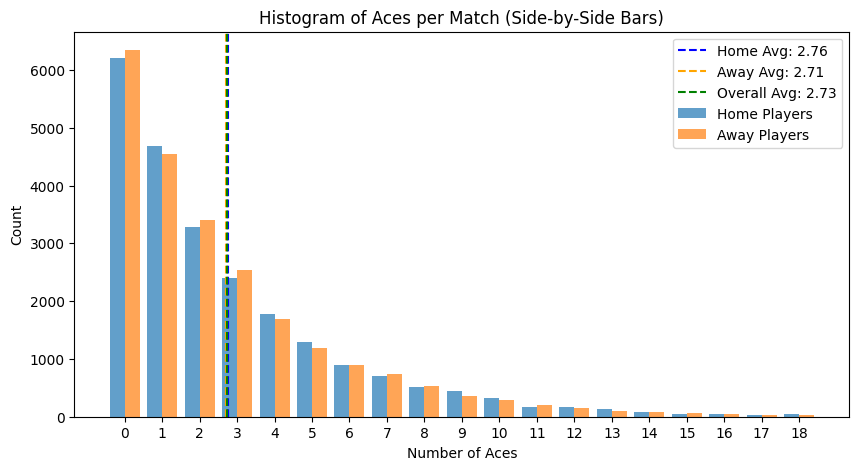

In [4]:
# Visualization
plt.figure(figsize=(10, 5))

bins = range(0, 20)
home_counts, bin_edges = np.histogram(home_numeric.dropna(), bins=bins)
away_counts, _ = np.histogram(away_numeric.dropna(), bins=bins)
bin_width = 0.4
bin_centers = np.array(bin_edges[:-1])

# Bar plots
plt.bar(bin_centers - bin_width / 2, home_counts, width=bin_width, label='Home Players', alpha=0.7)
plt.bar(bin_centers + bin_width / 2, away_counts, width=bin_width, label='Away Players', alpha=0.7)

# Average lines
home_avg = home_numeric.mean()
away_avg = away_numeric.mean()
overall_avg = (pd.concat([home_numeric, away_numeric])).mean()

plt.axvline(home_avg, color='blue', linestyle='--', label=f'Home Avg: {home_avg:.2f}')
plt.axvline(away_avg, color='orange', linestyle='--', label=f'Away Avg: {away_avg:.2f}')
plt.axvline(overall_avg, color='green', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')

# Labels
plt.title('Histogram of Aces per Match (Side-by-Side Bars)')
plt.xlabel('Number of Aces')
plt.ylabel('Count')
plt.xticks(bin_centers)
plt.legend()
plt.savefig('../data/output/figures/img7.png')
plt.show()